<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%202%20-%20Calculus%20and%20Data%20Visualisation/Week_2_Data_Analysis_Example_3_and_8_MNIST_without_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow 

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

## Libraries

In [0]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

## Data preparation

To get MNIST data we use the function fetch_mldata, in the datasets package. Let's get all the dataset, and then we will select only the digits we want.

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
Xinput_,yinput_ = x_train, y_train

Xinput_ = x_train.reshape(60000,784)
yinput_ = y_train.reshape(60000,)

In [0]:
Xinput_,yinput_ = mnist["data"], mnist["target"]

In [4]:
Xinput_.shape

(60000, 784)

In [5]:
yinput_.shape

(60000,)

To know how many digits we have we can run this simple code

In [6]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(yinput_ == i), "times")

digit 0 appear 5923 times
digit 1 appear 6742 times
digit 2 appear 5958 times
digit 3 appear 6131 times
digit 4 appear 5842 times
digit 5 appear 5421 times
digit 6 appear 5918 times
digit 7 appear 6265 times
digit 8 appear 5851 times
digit 9 appear 5949 times


In [7]:
total = 0
for i in range(2):
    print ("digit", i, "makes", np.around(np.count_nonzero(yinput_ == i)/70000.0*100.0, decimals=1), "% of the 70000 observations")

digit 0 makes 8.5 % of the 70000 observations
digit 1 makes 9.6 % of the 70000 observations


# Select only digits 3 and 8

In [0]:
Xinput = Xinput_[np.any([yinput_ == 3,yinput_ == 8], axis = 0)]
yinput = yinput_[np.any([yinput_ == 3,yinput_ == 8], axis = 0)]

In [0]:
Xinput_rev = np.ndarray(Xinput.shape)
for i in range(Xinput.shape[0]):
    tmp = Xinput[i,:].reshape(28,28)
    Xinput_rev[i,:] = (np.ravel(tmp, order='F') > 230/255.0)

Are there digits completely empty now?

In [25]:
np.sum(np.sum(Xinput_rev, axis = 1) == 0)

0

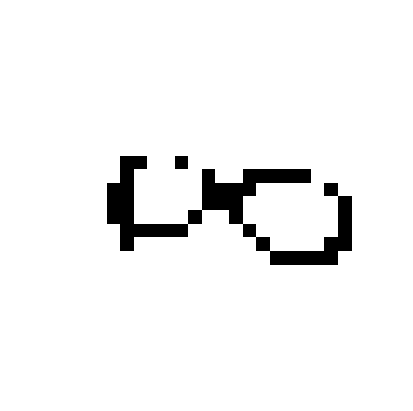

In [28]:
some_digit = Xinput_rev[123,:]

some_digit_image = some_digit.reshape(28,28)

plt.figure(figsize=(10,7))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [29]:
print(Xinput.shape)
print(yinput.shape)

(11982, 784)
(11982,)


# Manual data analysis

Now let's check how our data is looking at after transforming the 2-D images into a 1-D vectors, that have 784 components (remember that our images are 28x28).

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


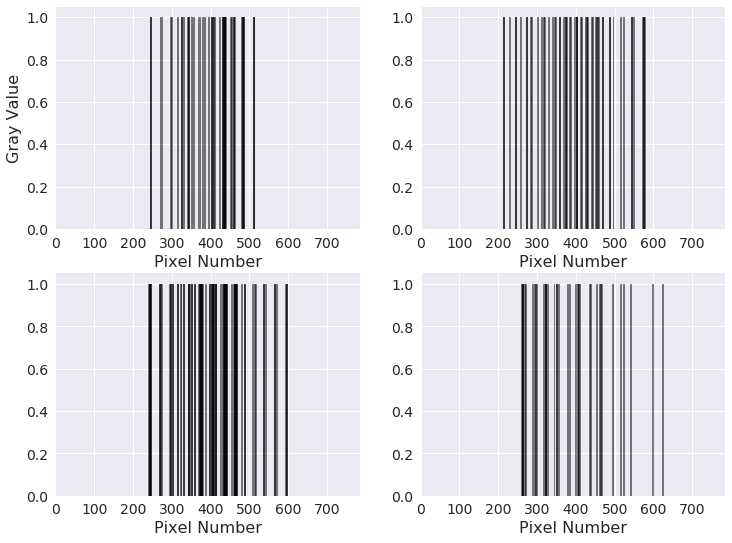

In [30]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(2, 2, 1)
plt.bar(x=np.arange(0,784,1),height=Xinput_rev[555,:], color = 'black', alpha = 0.5, width = 5.0) # 555 is 3
#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput_rev[879,:], color = 'black', alpha = 0.5, width = 5.0) #879 is 3
ax.set_xlabel('Pixel Number', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput_rev[78,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput_rev[111,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);




Is very interesting to note that all images look the same. Even without knowing what digit they are is rather simple to recognize that they must be the same digit!

### Another example of digit 3

<Figure size 432x288 with 0 Axes>

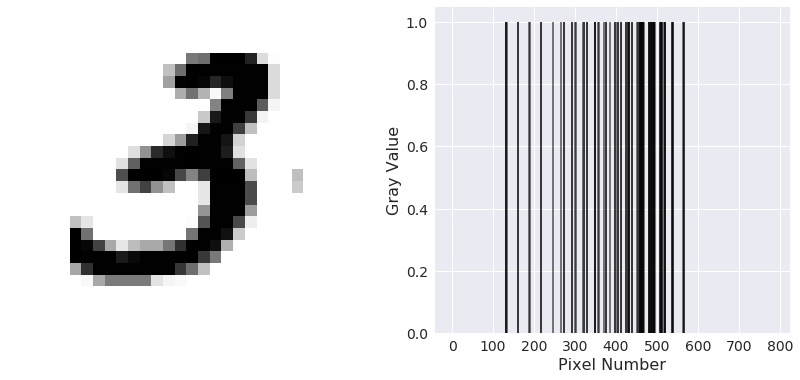

In [32]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

idx = 124

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1)

some_digit = Xinput[idx,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

var_shaped = Xinput_rev[idx,:]
#var_shaped = np.ravel(some_digit_image, order='F')


ax = fig.add_subplot(1, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
plt.bar(x=np.arange(0,784,1),height=var_shaped, color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);




### Digit 8

Now let's have a look at digit 2 and how it differs from digit 1

<Figure size 432x288 with 0 Axes>

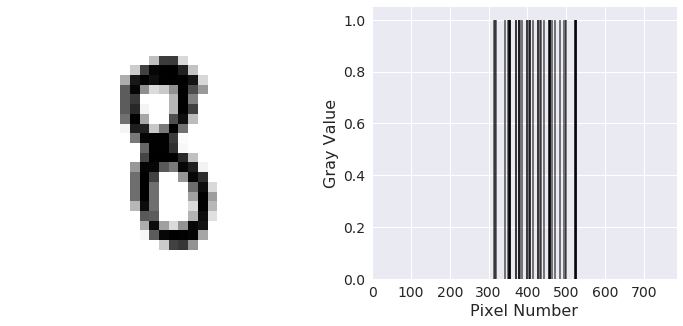

In [33]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

idx = 123

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 2, 1)

some_digit = Xinput[idx,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

var_shaped = Xinput_rev[idx,:]

ax = fig.add_subplot(1, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=var_shaped, color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Let's check some 8s

In [34]:
np.where(yinput == 8)

(array([    3,     6,     7, ..., 11978, 11979, 11981]),)

<Figure size 432x288 with 0 Axes>

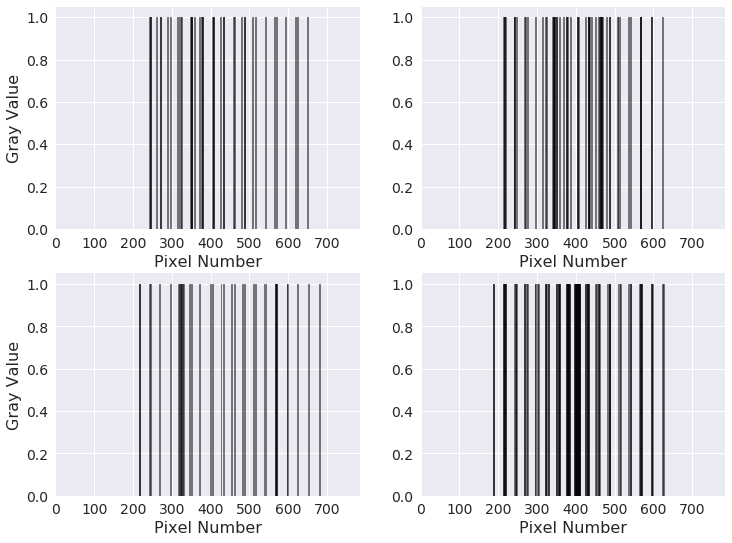

In [35]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(2, 2, 1)
plt.bar(x=np.arange(0,784,1),height=Xinput_rev[11978,:], color = 'black', alpha = 0.5, width = 5.0)
#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput_rev[11979,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput_rev[11981,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput_rev[6,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)

plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


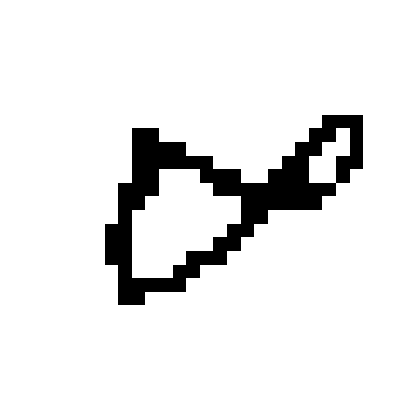

In [36]:
some_digit = Xinput_rev[7665,:]

some_digit_image = some_digit.reshape(28,28)
plt.figure(figsize=(12,7))

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

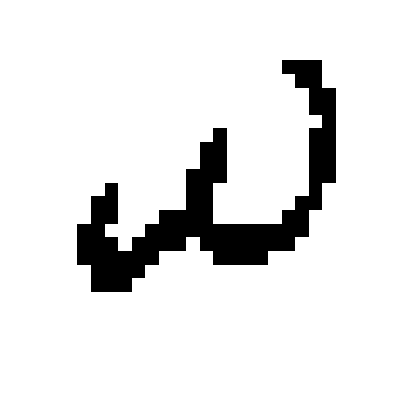

In [38]:
some_digit = Xinput_rev[124,:]

some_digit_image = some_digit.reshape(28,28)
plt.figure(figsize=(12,7))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

as expected we get lots of white pixels. But that does not tell us much, it actually hide the real useful information. So let's remove the really white pixel from the histogram

# New features

In [0]:
left = np.sum(Xinput_rev[:,0:400], axis = 1)
right = np.sum(Xinput_rev[:,400:784], axis = 1)

ratio = np.divide(right, left)
sum_all = np.sum(Xinput_rev, axis = 1)

Now let's see how they differ between ones and twos

In [0]:
left3 = left[yinput == 3]
left8 = left[yinput == 8]

ratio3 = ratio[yinput == 3]
ratio8 = ratio[yinput == 8]

right3 = right[yinput == 3]
right8 =  right[yinput == 8]

all3 = sum_all[yinput == 3]
all8 = sum_all[yinput == 8]

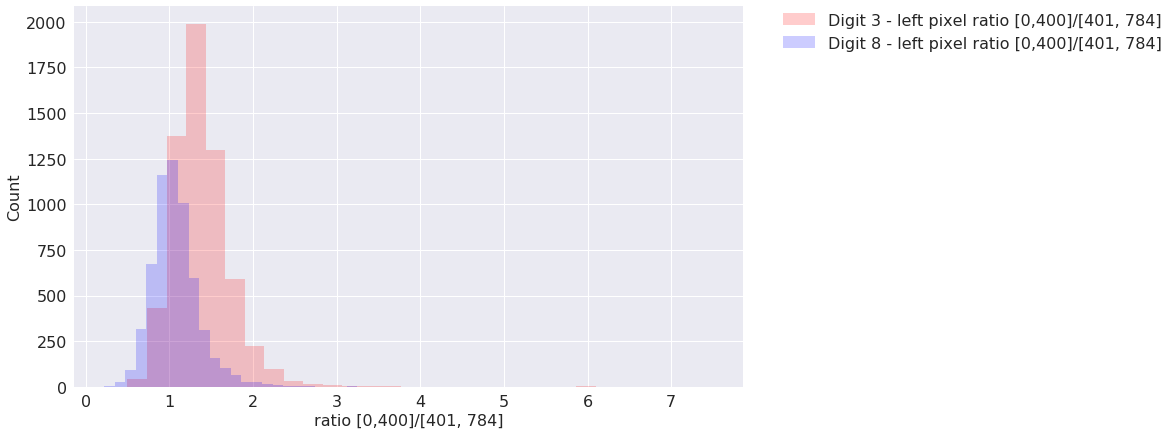

In [41]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(ratio3, bins = 30, alpha = 0.2, color = 'red', label = 'Digit 3 - left pixel ratio [0,400]/[401, 784]')
plt.hist(ratio8, bins = 30, alpha = 0.2, color = 'blue', label = 'Digit 8 - left pixel ratio [0,400]/[401, 784]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.xlabel('ratio [0,400]/[401, 784]', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.show()

## Predictions

We could decide that if the value of ```left``` lies below 7500 is a one and if above is a two.

In [0]:
pred = ratio > 1.2
yinput_scaled = yinput == 3

In [43]:
np.mean(pred == yinput_scaled)

0.7165748622934401

Out of curiosity we could try to find the best values for example for the right sum of pixels

In [44]:
chosen_value = 0
accuracy = 0
for i in np.arange (0, 2.0, 0.01):
    pred = ratio > i
    accuracy_ = np.mean(pred == yinput_scaled)
    if (accuracy_ > accuracy ):
        accuracy = accuracy_
        chosen_value = i
        
print ('i', chosen_value)
print('accuracy', accuracy)

i 1.19
accuracy 0.7183274912368552
